In [1]:
!pip install keras --upgrade tensorflow --upgrade
!pip install numpy
!pip install matplotlib
import matplotlib as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [2]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, SimpleRNN, Bidirectional
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

# Загрузка даних
max_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

max_length = 300
X_train = sequence.pad_sequences(X_train, maxlen=max_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_length)

# Створення і навчання LSTM
lstm_model = Sequential()
lstm_model.add(Embedding(max_words, 128, input_length=max_length))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64, verbose=1)

# Створення і навчання RNN
rnn_model = Sequential()
rnn_model.add(Embedding(max_words, 128, input_length=max_length))
rnn_model.add(SpatialDropout1D(0.2))
rnn_model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64, verbose=1)

# Створення і навчання двосторонній моделі LSTM
bidirectional_lstm_model = Sequential()
bidirectional_lstm_model.add(Embedding(max_words, 128, input_length=max_length))
bidirectional_lstm_model.add(SpatialDropout1D(0.2))
bidirectional_lstm_model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
bidirectional_lstm_model.add(Dense(1, activation='sigmoid'))
bidirectional_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
bidirectional_lstm_history = bidirectional_lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64, verbose=1)

# Створення і навчання глибокій RNN
deep_rnn_model = Sequential()
deep_rnn_model.add(Embedding(max_words, 128, input_length=max_length))
deep_rnn_model.add(SpatialDropout1D(0.2))
deep_rnn_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
deep_rnn_model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
deep_rnn_model.add(Dense(1, activation='sigmoid'))
deep_rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
deep_rnn_history = deep_rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64, verbose=1)


17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/5
391/391 [==============================] - 483s 1s/step - loss: 0.4293 - accuracy: 0.8042 - val_loss: 0.3379 - val_accuracy: 0.8578
Epoch 2/5
391/391 [==============================] - 478s 1s/step - loss: 0.2640 - accuracy: 0.8969 - val_loss: 0.3423 - val_accuracy: 0.8600
Epoch 3/5
391/391 [==============================] - 474s 1s/step - loss: 0.2126 - accuracy: 0.9207 - val_loss: 0.3541 - val_accuracy: 0.8468
Epoch 4/5
391/391 [==============================] - 477s 1s/step - loss: 0.1714 - accuracy: 0.9366 - val_loss: 0.3580 - val_accuracy: 0.8654
Epoch 5/5
391/391 [==============================] - 455s 1s/step - loss: 0.1664 - accuracy: 0.9384 - val_loss: 0.3820 - val_accuracy: 0.8680
Epoch 1/5
391/391 [==============================] - 116s 292ms/step - loss: 0.7063 - accuracy: 0.5073 - val_loss: 0.6903 - val_accuracy: 0.5296
Epoch 2/5
391/391 [==============================] - 116s 296ms/step - loss: 0.6

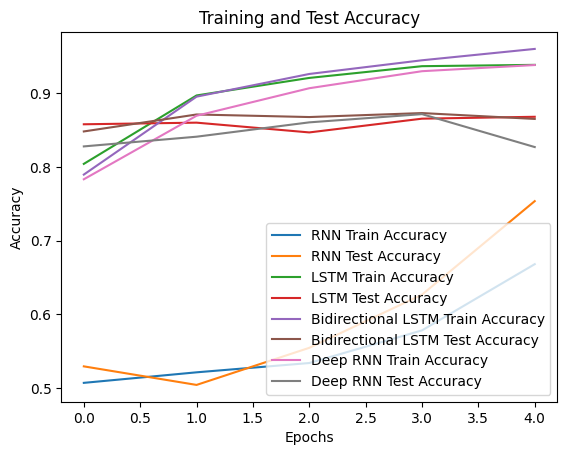

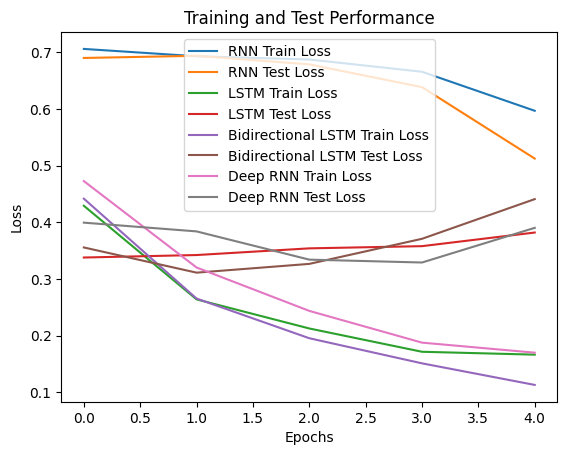

In [7]:
# Побудова графіків
for model_name, history in zip(models, histories):
    plt.plot(history.history['accuracy'], label=model_name + ' Train Accuracy')
    plt.plot(history.history['val_accuracy'], label=model_name + ' Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

for model_name, history in zip(models, histories):
    plt.plot(history.history['loss'], label=model_name + ' Train Loss')
    plt.plot(history.history['val_loss'], label=model_name + ' Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
# Сравнение результатов
for model_name, history in zip(models, histories):
    train_acc = history.history['accuracy'][-1]
    test_acc = history.history['val_accuracy'][-1]
    print(f"\n{model_name}:")
    print(f"Train Accuracy: {train_acc}")
    print(f"Test Accuracy: {test_acc}")

# Вывод результатов сравнения
best_model_idx = np.argmax([history.history['val_accuracy'][-1] for history in histories])
best_model_name = models[best_model_idx]
print(f"\nКраща: {best_model_name}")


RNN:
Train Accuracy: 0.6682000160217285
Test Accuracy: 0.7536399960517883

LSTM:
Train Accuracy: 0.9383999705314636
Test Accuracy: 0.8679999709129333

Bidirectional LSTM:
Train Accuracy: 0.9599999785423279
Test Accuracy: 0.8650799989700317

Deep RNN:
Train Accuracy: 0.9381600022315979
Test Accuracy: 0.826960027217865

Краща: LSTM
